In [2]:
from PIL import Image
from PIL import Image, ImageFilter
from PIL import Image, ImageEnhance
import pandas as pd
import os
import cv2
import numpy as np
import matplotlib.image as ig
from matplotlib import pyplot as plt
from __future__ import absolute_import, division, print_function
from collections import Counter
from PIL import Image
#import tensorflow as tf
from __future__ import absolute_import, division, print_function
from collections import Counter
import io

In [11]:
import pandas as pd
import os
def get_csv_data(video_folder_name, fileName):    
    data = pd.read_csv(fileName, sep=';')
    data.columns = ['ID', 'file_name', 'cut_frame']
    file_paths = []
    for entry in data.iloc():
        file_paths.append(video_folder_name + entry['file_name'])
    data['file_path'] = file_paths
    data.set_index('ID', inplace=True, drop=True)
#     data["cut_frame"] = pd.to_numeric(data["cut_frame"])
    return data


def get_videos_from_folder(video_folder_name):
    video_files = []
    for root, dirs, files in os.walk(video_folder_name):
        for filename in files:
            if '.mp4' in filename:
                video_files.append({"file_name": filename, "file_path": video_folder_name + filename})
    data = pd.DataFrame(video_files, columns=['file_name', 'file_path'])
    return data

test = get_csv_data('Task2_Videos/', 'Task2_Test.csv')

test.dropna(inplace=True)
display(test)

,file_name,cut_frame,file_path
ID,,,
1,_tigfCJFLZg_00293.mp4,131.0,Task2_Videos/_tigfCJFLZg_00293.mp4
2,_tigfCJFLZg_00295.mp4,85.0,Task2_Videos/_tigfCJFLZg_00295.mp4
3,_tigfCJFLZg_00298.mp4,93.0,Task2_Videos/_tigfCJFLZg_00298.mp4
4,_tigfCJFLZg_00299.mp4,138.0,Task2_Videos/_tigfCJFLZg_00299.mp4
5,_tigfCJFLZg_00301.mp4,124.0,Task2_Videos/_tigfCJFLZg_00301.mp4
...,...,...,...
86,_tigfCJFLZg_00428.mp4,45.0,Task2_Videos/_tigfCJFLZg_00428.mp4
87,_tigfCJFLZg_00429.mp4,125.0,Task2_Videos/_tigfCJFLZg_00429.mp4
88,_tigfCJFLZg_00430.mp4,49.0,Task2_Videos/_tigfCJFLZg_00430.mp4


In [35]:
import cv2
import numpy as np
import math

class_names = ['wet', 'dry']
from scipy.ndimage import rotate


def get_label_for_frame(frame_number, cut_frame):
    if(frame_number >= cut_frame):
        return 0
    else:
        return 1   
    
def get_frames_labels(data):
    frames = []
    labels = []
    videos = []
    
    for file in data.iloc():
        file_path = file['file_path']
        cutframe = file['cut_frame']
        file_name = file['file_name']
        
        # Playing video from file:
        cap = cv2.VideoCapture(file['file_path'])
        totalFrames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        currentFrame = 0
        success, frame = cap.read()
        

        while(success):
            
            label = get_label_for_frame(currentFrame, cutframe)
            
            
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
           # frame = cv2.resize(frame, (256,256))
           
                
            videos.append(file_name)  
            frames.append(frame)
            labels.append(label)

            currentFrame += 1
            success, frame = cap.read()
            
        cap.release()
        cv2.destroyAllWindows()
    
    return (frames, labels, videos)

test_frames, test_labels, test_video= get_frames_labels(test)


In [250]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


def get_needed_frames(videos, frames, labels):
        
    df1 = pd.DataFrame(columns = ['Number' , 'Frame', 'Video']) 
    #a=0
    for i in range(0,len(test_frames)):
        if(labels[i]==0):

            df1=df1.append({'Number' : i , 'Frame' : frames[i], 'Video' : videos[i][10:]},ignore_index=True)
   
    #print(df1) 
    frame =[]
    video = []
    for item in df1.iloc():
    
        video.append(item['Video'])  
        frame.append(item['Frame'])
          
    
      
    listDFs=[]
    df = pd.DataFrame(columns = ['Number' , 'Frame', 'Video']) 
    
    for i in range(1,len(video)):
        if(str(video[i])==str(video[i-1])):
           
            df = df.append({'Number' : i , 'Frame' : frame[i], 'Video' : video[i][10:]},ignore_index=True)
            #print("if")
        else:
            listDFs.append(df)
            df=pd.DataFrame(columns = ['Number' , 'Frame', 'Video'])    
            #print("else")
        
    print(listDFs[0])  
    print(listDFs[1])
    print(listDFs[2])
    return listDFs
                         
listDFs = get_needed_frames(test_video, test_frames, test_labels)

   Number                                              Frame Video
0       1  [[[21, 77, 120], [83, 139, 182], [81, 139, 197...     4
1       2  [[[27, 79, 123], [91, 143, 187], [90, 143, 203...     4
2       3  [[[34, 81, 125], [100, 147, 191], [97, 146, 20...     4
3       4  [[[34, 81, 129], [101, 148, 196], [100, 149, 2...     4
4       5  [[[32, 80, 130], [102, 150, 200], [99, 149, 21...     4
5       6  [[[30, 81, 132], [101, 152, 203], [99, 151, 21...     4
6       7  [[[27, 79, 133], [99, 151, 205], [98, 153, 219...     4
7       8  [[[29, 79, 137], [100, 150, 208], [96, 152, 22...     4
8       9  [[[29, 75, 137], [100, 146, 208], [91, 153, 22...     4
9      10  [[[31, 77, 139], [102, 148, 210], [92, 154, 22...     4
10     11  [[[32, 78, 140], [103, 149, 211], [92, 154, 22...     4
11     12  [[[33, 79, 141], [104, 150, 212], [93, 155, 22...     4
12     13  [[[33, 79, 141], [104, 150, 212], [93, 155, 22...     4
13     14  [[[33, 79, 141], [104, 150, 212], [93, 155, 22...  

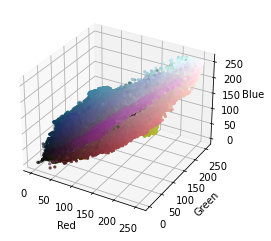

In [9]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

r, g, b = cv2.split(training_frames[0])
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")


pixel_colors = training_frames[7].reshape((np.shape(training_frames[7])[0]*np.shape(training_frames[0])[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

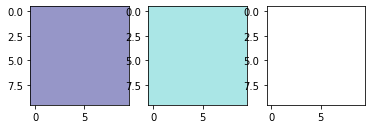

In [320]:
light_white = (150, 150, 200)
hellblau = (170,230,230)
dark_white = (255, 255, 255)


lw_square = np.full((10, 10, 3), light_white, dtype=np.uint8) / 255.0
hellblau = np.full((10, 10, 3), hellblau, dtype=np.uint8) / 255.0
dw_square = np.full((10, 10, 3), dark_white, dtype=np.uint8) / 255.0


plt.subplot(1, 3, 1)
plt.imshow(lw_square)
plt.subplot(1, 3, 2)
plt.imshow(hellblau)
plt.subplot(1, 3, 3)
plt.imshow(dw_square)
plt.show()

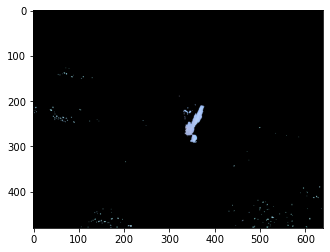

5202


(480, 640, 3)

In [546]:
img= test_frames[5362]

mask_white = cv2.inRange(img, light_white, dark_white)
result_white = cv2.bitwise_and(img, img, mask=mask_white)

plt.imshow(result_white)
plt.show()


#count pixels

pixel_count = np.sum(result_white != (0,0,0))
print(pixel_count)

result_white.shape

_tigfCJFLZg_00324.mp4


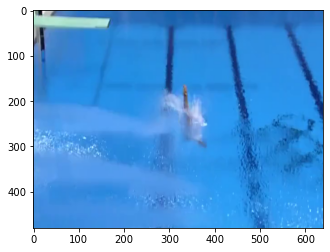

In [580]:
plt.imshow(test_frames[2810])

print(test_video[2800])
#337


_tigfCJFLZg_00317.mp4


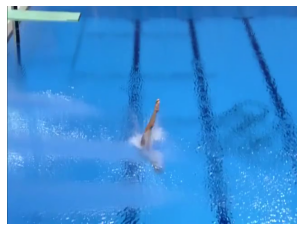

In [391]:
plt.imshow(test_frames[10890])
plt.axis('off')
plt.savefig("frame140.jpg", bbox_inches='tight', pad_inches=0, dpi = 159)


print(test_video[2250])

#video316

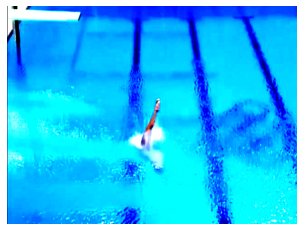

In [372]:
img = Image.open('frame140.jpg')

img = img.convert("RGB")

enhancer = ImageEnhance.Contrast(img)

factor = 4 #gives original image
img = enhancer.enhance(factor)
plt.imshow(img)
plt.axis('off')
plt.savefig("frame140.jpg", bbox_inches='tight', pad_inches=0, dpi = 159)

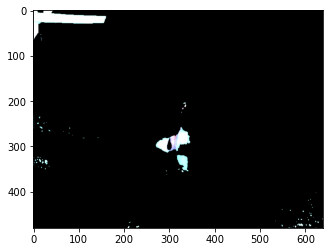

19602


(480, 640, 3)

In [373]:
img= ig.imread("frame140.jpg")


mask_white = cv2.inRange(img, light_white, dark_white)
result_white = cv2.bitwise_and(img, img, mask=mask_white)

plt.imshow(result_white)
plt.show()


#count pixels

pixel_count = np.sum(result_white != (0,0,0))
print(pixel_count)

result_white.shape

_tigfCJFLZg_00436.mp4


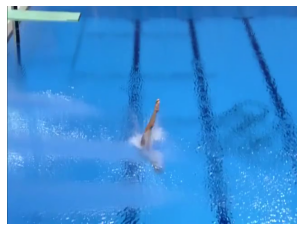

In [375]:
plt.imshow(test_frames[5362])
plt.axis('off')
plt.savefig("frame140.jpg", bbox_inches='tight', pad_inches=0, dpi = 159)


print(test_video[10890])

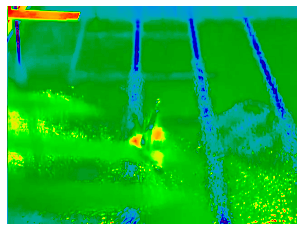

In [376]:
frame= cv2.imread("frame140.jpg",0)
frame = plt.imshow(frame, cmap='nipy_spectral')
#remove axis
plt.axis('off')

# save image 
plt.savefig("frame140.jpg", bbox_inches='tight', pad_inches=0, dpi = 159)

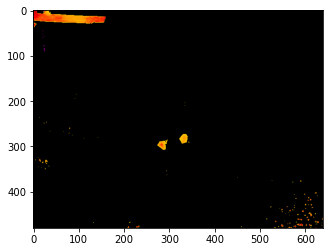

9668


(480, 640, 3)

In [377]:

img = ig.imread('frame140.jpg')
#plt.imshow(img)

rot = (130, 0, 0)
orange = (255, 210, 210)

mask_white = cv2.inRange(img, rot, orange)
result_white = cv2.bitwise_and(img, img, mask=mask_white)

plt.imshow(result_white)
plt.show()


#count pixels

pixel_count = np.sum(result_white != (0,0,0))
print(pixel_count)

result_white.shape


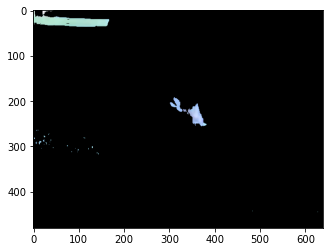

13647


(480, 640, 3)

In [581]:
img= test_frames[2810]


mask_white = cv2.inRange(img, light_white, dark_white)
result_white = cv2.bitwise_and(img, img, mask=mask_white)

plt.imshow(result_white)
plt.show()


#count pixels

pixel_count = np.sum(result_white != (0,0,0))
print(pixel_count)

result_white.shape

# Format Image in 2D (Where masked_image != Black)

In [582]:
indices = np.where(result_white!= (0,0,0))
my_coords = []
for  i in range(1,len(indices[0])): 
    x = indices[1][i]
    y = indices[0][i]
    
    my_coords.append((x,y))
       

print(my_coords)

[(1, 0), (1, 0), (2, 0), (2, 0), (2, 0), (3, 0), (3, 0), (3, 0), (20, 0), (20, 0), (20, 0), (21, 0), (21, 0), (21, 0), (22, 0), (22, 0), (22, 0), (23, 0), (23, 0), (23, 0), (24, 0), (24, 0), (24, 0), (25, 0), (25, 0), (25, 0), (26, 0), (26, 0), (26, 0), (27, 0), (27, 0), (27, 0), (28, 0), (28, 0), (28, 0), (29, 0), (29, 0), (29, 0), (30, 0), (30, 0), (30, 0), (31, 0), (31, 0), (31, 0), (32, 0), (32, 0), (32, 0), (33, 0), (33, 0), (33, 0), (34, 0), (34, 0), (34, 0), (35, 0), (35, 0), (35, 0), (36, 0), (36, 0), (36, 0), (37, 0), (37, 0), (37, 0), (38, 0), (38, 0), (38, 0), (39, 0), (39, 0), (39, 0), (40, 0), (40, 0), (40, 0), (41, 0), (41, 0), (41, 0), (42, 0), (42, 0), (42, 0), (43, 0), (43, 0), (43, 0), (44, 0), (44, 0), (44, 0), (1, 1), (1, 1), (1, 1), (2, 1), (2, 1), (2, 1), (3, 1), (3, 1), (3, 1), (21, 1), (21, 1), (21, 1), (22, 1), (22, 1), (22, 1), (23, 1), (23, 1), (23, 1), (24, 1), (24, 1), (24, 1), (25, 1), (25, 1), (25, 1), (26, 1), (26, 1), (26, 1), (27, 1), (27, 1), (27, 1),

In [583]:
unique_coordinates = list(set(list(my_coords)))
my_sorted_coord=sorted(unique_coordinates)
print(my_sorted_coord)

[(1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (1, 22), (1, 23), (1, 24), (1, 25), (1, 26), (1, 27), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (2, 15), (2, 16), (2, 17), (2, 18), (2, 19), (2, 20), (2, 21), (2, 22), (2, 23), (2, 24), (2, 25), (2, 26), (2, 27), (2, 28), (2, 29), (2, 30), (2, 31), (2, 281), (2, 282), (2, 283), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (3, 16), (3, 17), (3, 18), (3, 19), (3, 20), (3, 21), (3, 22), (3, 23), (3, 24), (3, 25), (3, 26), (3, 27), (3, 281), (3, 282), (3, 283), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (4, 16), (4, 17), (4, 18), (4, 19), (4, 20), (4, 21), (4, 22), (4, 23), (4, 24), (4, 25), (4, 26), (4, 27), (5, 15), (5, 16

# Clustering mit DBSCAN

[[  1   0]
 [  1   1]
 [  1   2]
 ...
 [382 252]
 [484 442]
 [628 444]]
NUMBER OF CLUSTERS: 5
NUMBER OF NOISES: 245
[-1 -1 -1 ... -1 -1 -1]
[2924   57   76  288  959]
[0]
57


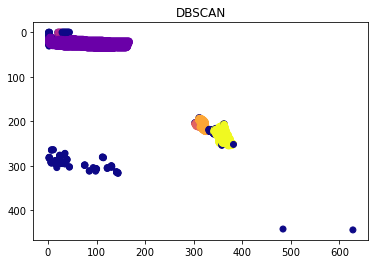

In [584]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

def dbscan(X, eps, min_samples):
    #ss = StandardScaler()
    #Xi = ss.fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    y_pred = db.fit_predict(X)
    plt.gca().invert_yaxis()
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='plasma')
    plt.title("DBSCAN")
    labels=db.labels_
    print(X)
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    
    
    print("NUMBER OF CLUSTERS:",n_clusters_)
    print("NUMBER OF NOISES:",n_noise_)
    print(labels)

    counts = np.bincount(labels[labels>=0])
    print(counts)
    labels1, counts = np.unique(labels[labels>=0], return_counts=True)
    max1 = labels1[np.argsort(-counts)[:1]]
    print(max1)
    cluster = np.array(X[labels == max1])
    df=pd.DataFrame(cluster)
    
    
    return df,counts
    
    
    
df,counts =dbscan(np.array(my_sorted_coord),eps=4, min_samples=40)

print(counts[1])

In [585]:
# Data of biggest Cluster

print(df)es
print(df.describe())

        0   1
0       1  13
1       1  14
2       1  15
3       1  16
4       1  17
...   ...  ..
2919  167  20
2920  167  21
2921  167  22
2922  167  23
2923  167  24

[2924 rows x 2 columns]
                 0            1
count  2924.000000  2924.000000
mean     81.629617    25.304036
std      46.693357     5.621507
min       1.000000    11.000000
25%      41.000000    21.000000
50%      81.000000    25.000000
75%     121.000000    30.000000
max     167.000000    36.000000


[[  1 214]
 [  1 221]
 [  1 222]
 ...
 [632 390]
 [633 389]
 [636 437]]
NUMBER OF CLUSTERS: 2
NUMBER OF NOISES: 493
[-1 -1 -1 ... -1 -1 -1]
[1053  188]
[0]


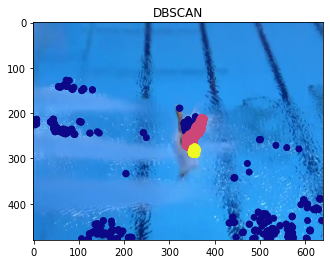

In [550]:
dbscan(np.array(my_sorted_coord),eps=4, min_samples=40)
plt.imshow(result_white)
plt.imshow()

[[  1 214]
 [  1 221]
 [  1 222]
 ...
 [632 390]
 [633 389]
 [636 437]]
NUMBER OF CLUSTERS: 2
NUMBER OF NOISES: 493
[-1 -1 -1 ... -1 -1 -1]
[1053  188]
[0]


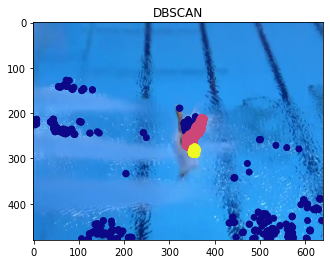

In [553]:
img = (test_frames[5362])
dbscan(np.array(my_sorted_coord),eps=4, min_samples=40)
plt.imshow(result_white)
plt.imshow(img)

[[  1 214]
 [  1 221]
 [  1 222]
 ...
 [632 390]
 [633 389]
 [636 437]]
NUMBER OF CLUSTERS: 2
NUMBER OF NOISES: 493
[-1 -1 -1 ... -1 -1 -1]
[1053  188]
[0]


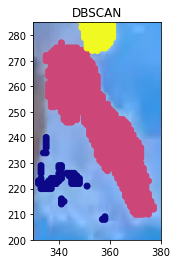

In [557]:
dbscan(np.array(my_sorted_coord),eps=4, min_samples=40)
plt.imshow(img)

plt.ylim([200,285])
plt.xlim([330,380])

plt.show()
